**REGRESSION PROJECT**

**Hypothesis**

Holidays are a major factor of increased sales/ holidays positive impact on sales.

Sales in the month December are higher than the other months.

**Questions**

1. Which store_number had the highest sales
2. Which store_number had the highest number of transactions
3. Which year had the highest number of transactions
4. Which family/item had the highest sales(Top items with the highest sales)
5. Which year had the highest sales (plot year vs sale)
7. Which city had the highest number of stores
8. Which state had the highest number of stores
10. Which locale has the most holidays
11. Which locale name had the most holidays
12. what are the prices of oil over the given dates


Importing Libries

In [149]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import datetime
import calendar
import warnings
%matplotlib inline
import pathlib as path
import glob as glob
from os import walk
from sort_dataframeby_monthorweek import *
from chart_studio.plotly import plot
import plotly.graph_objects as go
import plotly.offline as py
from sklearn.model_selection import TimeSeriesSplit

import scipy
import sklearn
import lightgbm as lgb
from tqdm.notebook import tqdm_notebook
import xgboost as xgb


Importing Dataset

In [150]:
#reading csv files
train_df = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\train.csv.csv")
test_df = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\test.csv.csv")
stores_df = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\stores.csv.csv")
sample_submissions_df = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\sample_submission.csv.csv")
holidays_events_df = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\holidays_events.csv.csv")
oil_prices_df = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\oil.csv.csv")
transactions_df = pd.read_csv (r"C:\Users\selas\OneDrive\Desktop\project 2 (regression ).csv\transactions.csv.csv")


**Exploring, Cleaning and Visualising all Datasets**

In [151]:
# puting all datasets in one dictionary in order to use it to check for missen values.
DATASETS = {'oil_prices':oil_prices_df,'sample_submissions':sample_submissions_df,'holidays_events':holidays_events_df,
            'stores':stores_df,'train':train_df,'test':test_df,'transactions':transactions_df}

In [152]:
#checking for missing values

for dataset in DATASETS: 
    print('-'*10)
    print(dataset)
    print('-'*10)
    print(DATASETS[dataset].isnull().sum())
    print()

----------
oil_prices
----------
date           0
dcoilwtico    43
dtype: int64

----------
sample_submissions
----------
id       0
sales    0
dtype: int64

----------
holidays_events
----------
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

----------
stores
----------
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

----------
train
----------
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

----------
test
----------
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

----------
transactions
----------
date            0
store_nbr       0
transactions    0
dtype: int64



From the above, we can see that out of all the datasets, only **oil_prices** have missen values. The rest of the dataset do not have missen values.

lets visualize all datasets.

In [153]:
train_df.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [154]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


We can see that the date column's datatype is object so lets change it to datetime format.

In [155]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


we can see that the format has changed now.

In [156]:
# which store number had the highest sale
import math
sales_per_store_nmb= train_df.groupby('store_nbr')['sales'].sum().sort_values(ascending=False).reset_index().head(54)
sales_per_store_nmb['sales']=sales_per_store_nmb['sales'].apply(lambda x: math.ceil(x))
sales_per_store_nmb

,store_nbr,sales
0,44,62087554
1,45,54498011
2,47,50948311
3,3,50481911
4,49,43420096
5,46,41896063
6,48,35933131
7,51,32911490
8,8,30494287
9,50,28653021


**Which store_number had the highest sales**

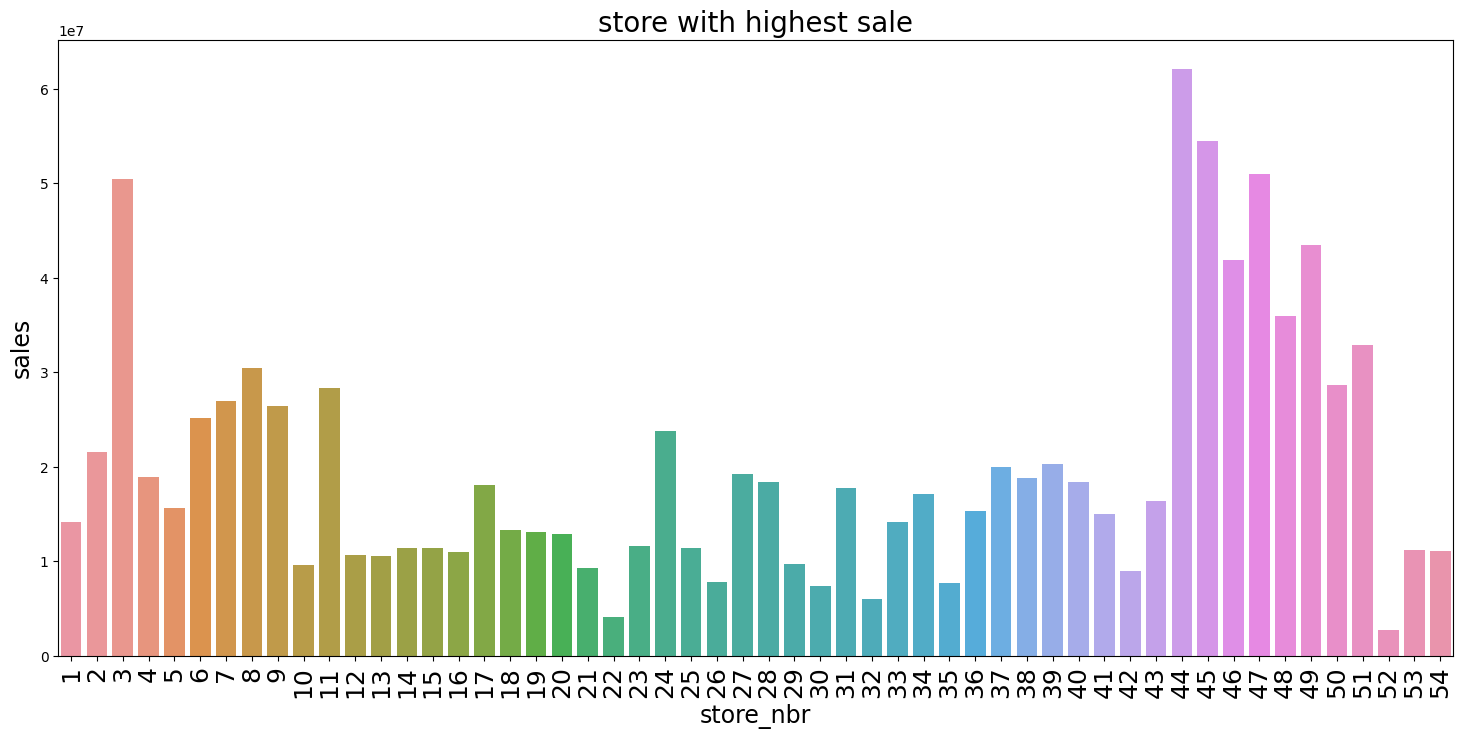

In [157]:
#ploting sales vs store number

plots=plt.figure(figsize=(18,8))
plots=plt.title('store with highest sale',fontsize=20)
plots=plt.xticks(fontsize=18,rotation='vertical')
plots=plt.xlabel('store_nbr',fontsize=17)
plots=plt.ylabel('sales',fontsize=17)
plots=sns.barplot(x='store_nbr',y='sales',data=sales_per_store_nmb)
plt.savefig('top10startups.png',dpi=300)

#for bar in plots.patches:
 #plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')

plt.show()

from my bar graph, store number 44 has the highest sale and store number 52 has the lowest sale.

**Which store_number had the highest number of transactions**

In [158]:
transactions_df.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [159]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


lets change the format of date column from object to datetime

In [160]:
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [161]:
store_no_wth_max_transactions = transactions_df.groupby(['store_nbr'], as_index=False).agg({'transactions':'sum'})
store_no_wth_max_transactions

,store_nbr,transactions
0,1,2553963
1,2,3219901
2,3,5366350
3,4,2519007
4,5,2347877
5,6,3065896
6,7,2995993
7,8,4637971
8,9,3516162
9,10,1652493


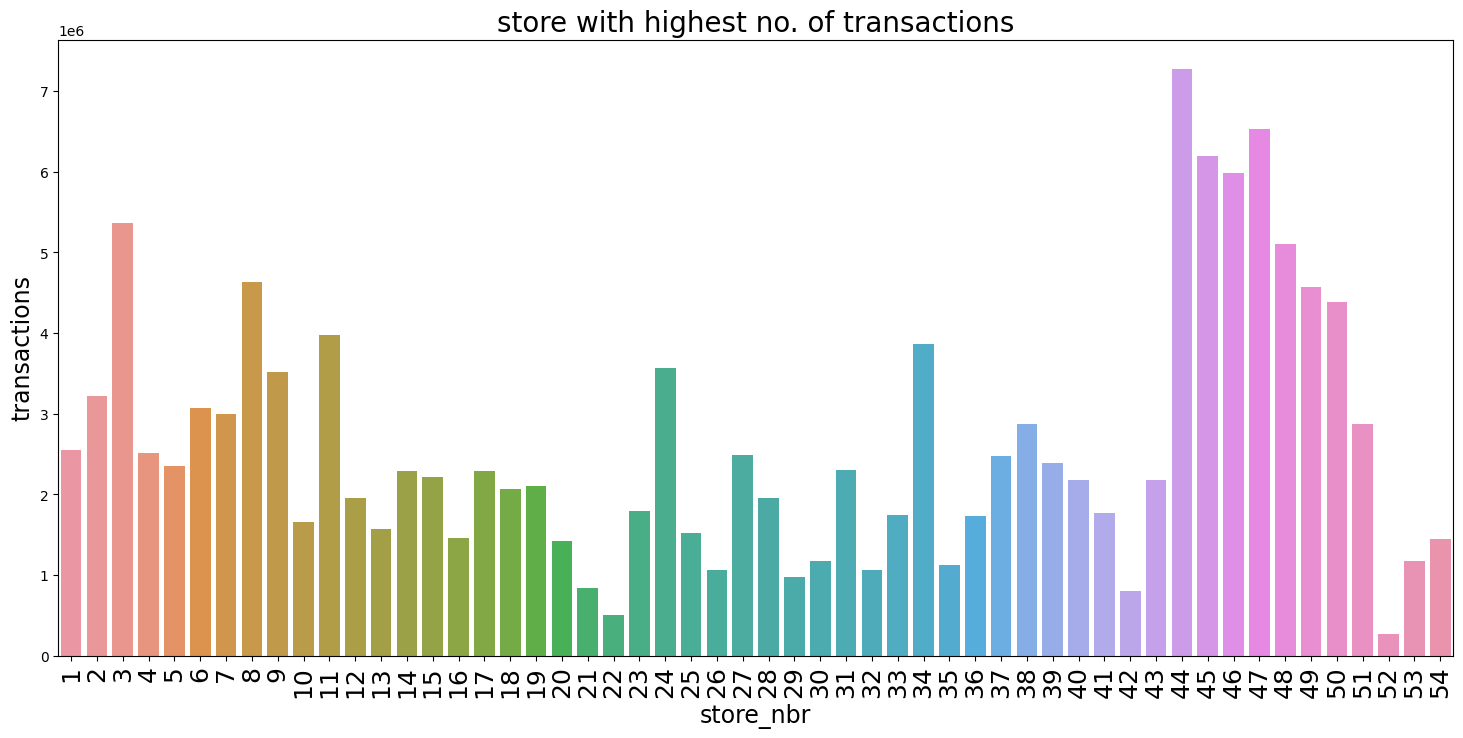

In [162]:
#plotting transactions vs store_nbr
plots=plt.figure(figsize=(18,8))
plots=plt.title('store with highest no. of transactions',fontsize=20)
plots=plt.xticks(fontsize=18,rotation='vertical')
plots=plt.xlabel('store_nbr',fontsize=17)
plots=plt.ylabel('sales',fontsize=17)
plots=sns.barplot(x='store_nbr',y='transactions',data=store_no_wth_max_transactions)
plt.savefig('top10startups.png',dpi=300)


Store_nbr 44 has the highest number of transactions. And store_nbr 52 has the lowest no of transactions

**Which year had the highest sales (plot year vs sale)**

In [163]:
#converting date column to datetime64 type
#train_df['date'] = train_df['date'].astype('datetime64')

# getting year out of the date column in the train dataset.
train_df['year'] = train_df['date'].dt.year
train_df['month_name'] = train_df['date'].dt.month_name()
train_df['day_of_week_name'] = train_df['date'].dt.day_name()

train_df

,id,date,store_nbr,family,sales,onpromotion,year,month_name,day_of_week_name
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,January,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,January,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,January,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,January,Tuesday
4,4,2013-01-01,1,BOOKS,0.000,0,2013,January,Tuesday
...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,August,Tuesday
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,August,Tuesday
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,August,Tuesday
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,August,Tuesday


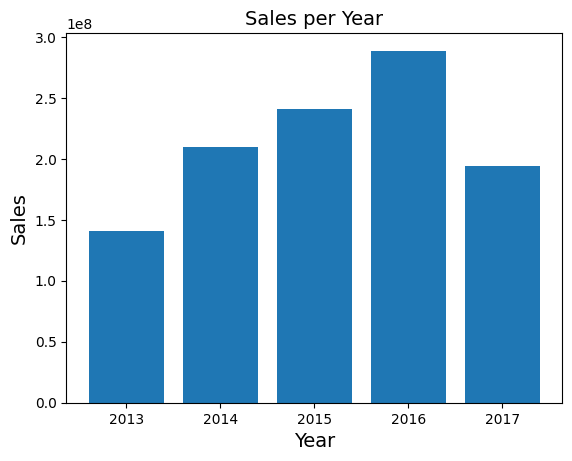

In [164]:
# Group By Year and Sum of sales for each year
ywhs=train_df.groupby(['year'], as_index=False).agg({'sales':'sum'})

#Plotting year Vs sales
plots=plt.bar(ywhs.year, ywhs.sales)
plt.title('Sales per Year',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Year',fontsize=14)

#for bar in plots.patches:
 #plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')
plt.show()


The graph is showing that Sales are increasing each year except 2017. So lets go on and view each years sales and see why sales dropped in 2017.

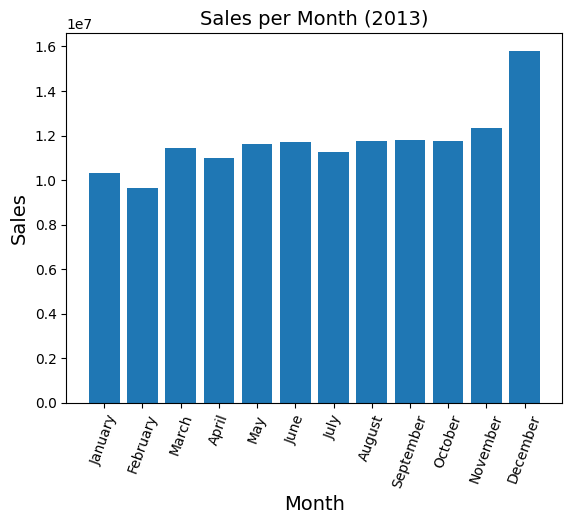

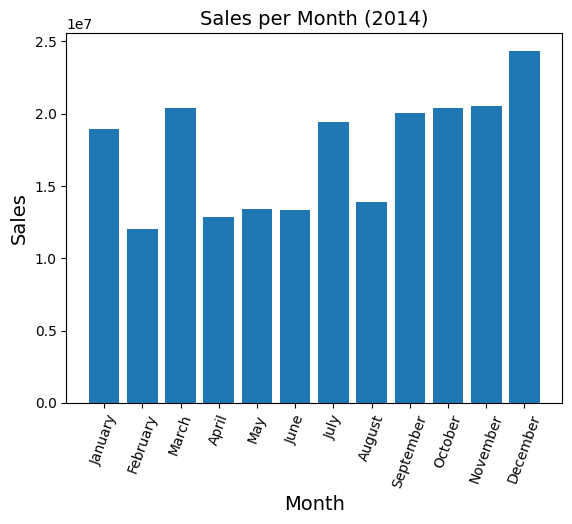

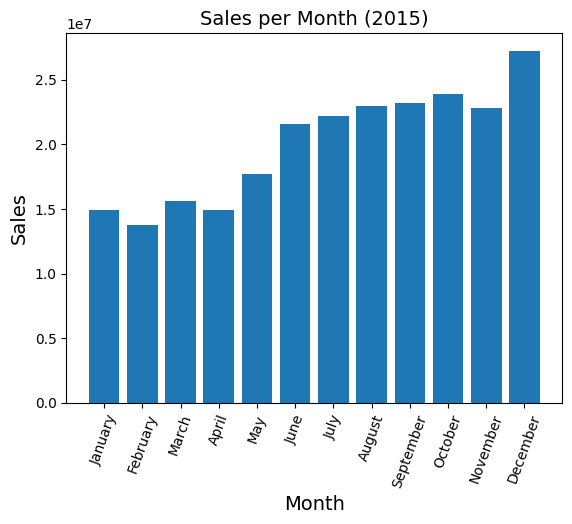

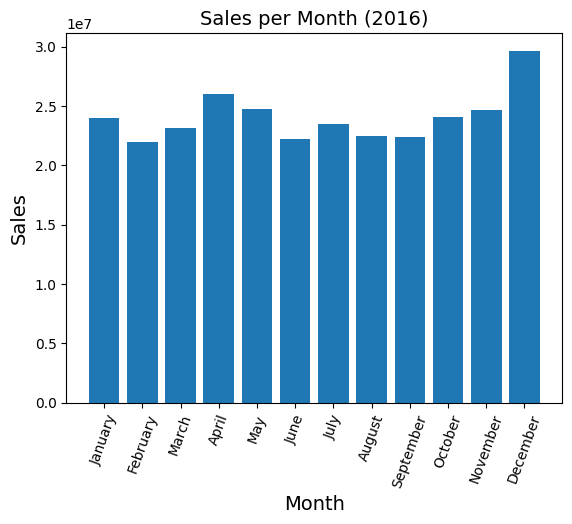

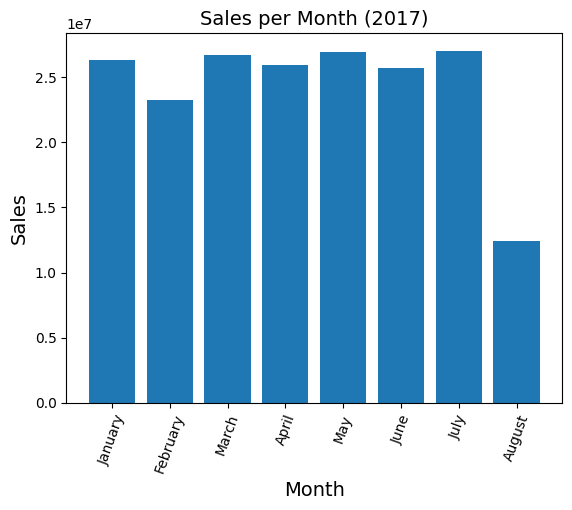

In [165]:
for year in train_df["date"].dt.year.unique():
    #Filtering data for specific year
    x = train_df[train_df["date"].dt.year == year]

    #Extracting month name from date
    x['month_name']=x['date'].dt.month_name()

    #Grouping data by months and adding sales
    x=x.groupby(['month_name'], as_index=False).agg({'sales':'sum'})
    
    #Sorting dataframe by Month
    x = Sort_Dataframeby_Month(df = x,monthcolumnname='month_name')

    #Plotting month Vs unit_sales for every year
    #plt.figure(figsize=(12,8))
    plt.bar(x.month_name, x.sales)
    plt.xticks(rotation=70)
    plt.title("Sales per Month ("+str(year)+")",fontsize=14)
    plt.ylabel('Sales',fontsize=14)
    plt.xlabel('Month',fontsize=14)
    warnings.filterwarnings('ignore')
    plt.show()
    #del x


December has the maximum sales every year. We can assume this is due to Christmas season

February month has the minimum sales every year.

This confirms that the sales vary with the 'Date' and there is a seasonality factor present in the data.
Now we know why 2017 sales did not increase.this is because, sales data for the year 2017 is only till 15th of August.

In [166]:
sales_per_weekdays = train_df.groupby('day_of_week_name')['sales'].sum().sort_values(ascending=False).reset_index().head(7)
sales_per_weekdays

,day_of_week_name,sales
0,Sunday,1.980523e+08
1,Saturday,1.861015e+08
2,Monday,1.488278e+08
3,Wednesday,1.423787e+08
4,Friday,1.390978e+08
5,Tuesday,1.379221e+08
6,Thursday,1.212646e+08


Text(0, 0.5, 'Sales')

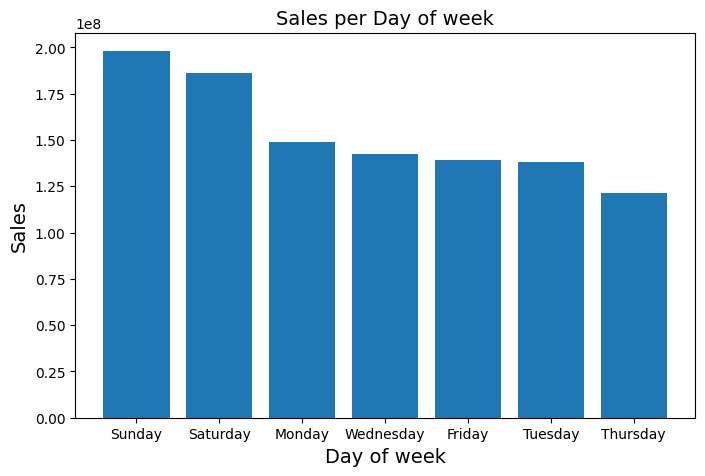

In [167]:
# plotting sales per weekdays

x = sales_per_weekdays
plt.figure(figsize=(8,5))
plt.bar(x.day_of_week_name, x.sales)
plt.title('Sales per Day of week', fontsize= 14)
plt.xlabel('Day of week', fontsize= 14)
plt.ylabel('Sales', fontsize= 14)

from the bar graph above, we can tell that on weekends (Saturdays and sundays) sales are maximum especially on sundays.

**Which family/item had the highest sales(Top items with the highest sales)**

In [168]:
import math
sales_per_family = train_df.groupby('family')['sales'].sum().sort_values(ascending=False).reset_index().head(33)
sales_per_family['sales'] = sales_per_family['sales'].apply(lambda x: math.ceil(x))
sales_per_family


,family,sales
0,GROCERY I,343462735
1,BEVERAGES,216954486
2,PRODUCE,122704685
3,CLEANING,97521289
4,DAIRY,64487709
5,BREAD/BAKERY,42133946
6,POULTRY,31876005
7,MEATS,31086469
8,PERSONAL CARE,24592051
9,DELI,24110323


Text(0, 0.5, 'sales')

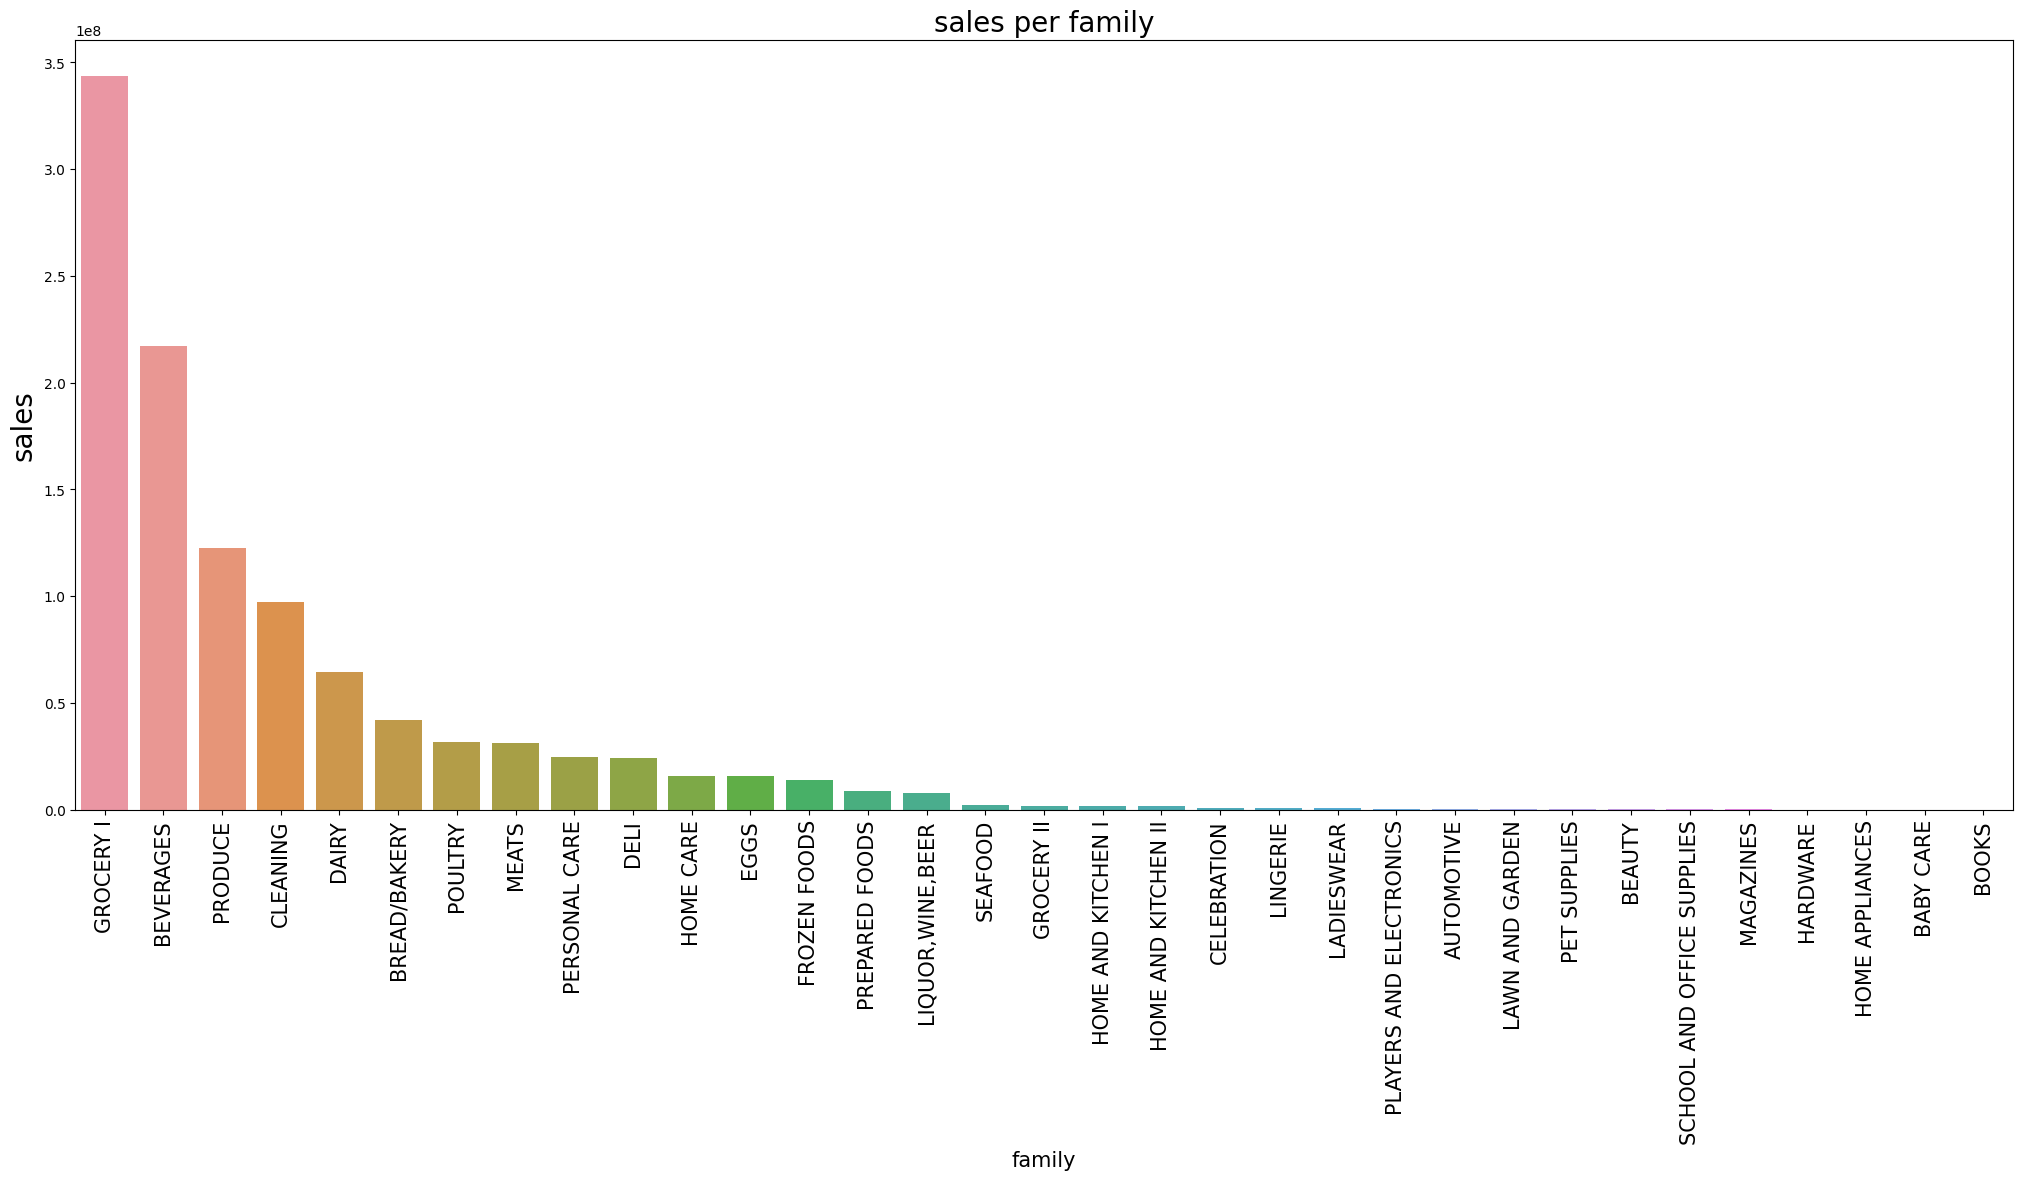

In [169]:
#Fetching no.of stores in each state
x = sales_per_family

#Plotting city Vs no.of stores
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
plots = sns.barplot(x = x.family, y= "sales",data=x)
plots.set_xticklabels(ax.get_xticklabels(), rotation = 'vertical', fontsize = 15)
#plots=plt.xticks(fontsize=18,rotation='vertical')
plt.title('sales per family',fontsize=20)
plt.xlabel('family',fontsize=15)
plt.ylabel('sales',fontsize=20)



lets analyse promotion vrs sales

In [170]:
import math
onpromo= train_df.groupby('onpromotion')['sales'].sum().sort_values(ascending=False).reset_index().head(10)
onpromo['sales']=onpromo['sales'].apply(lambda x: math.ceil(x))
onpromo

,onpromotion,sales
0,0,378139782
1,1,81612461
2,2,52627015
3,3,39964518
4,4,30706575
5,5,24801593
6,6,22583600
7,7,19343902
8,8,18310938
9,9,17433466


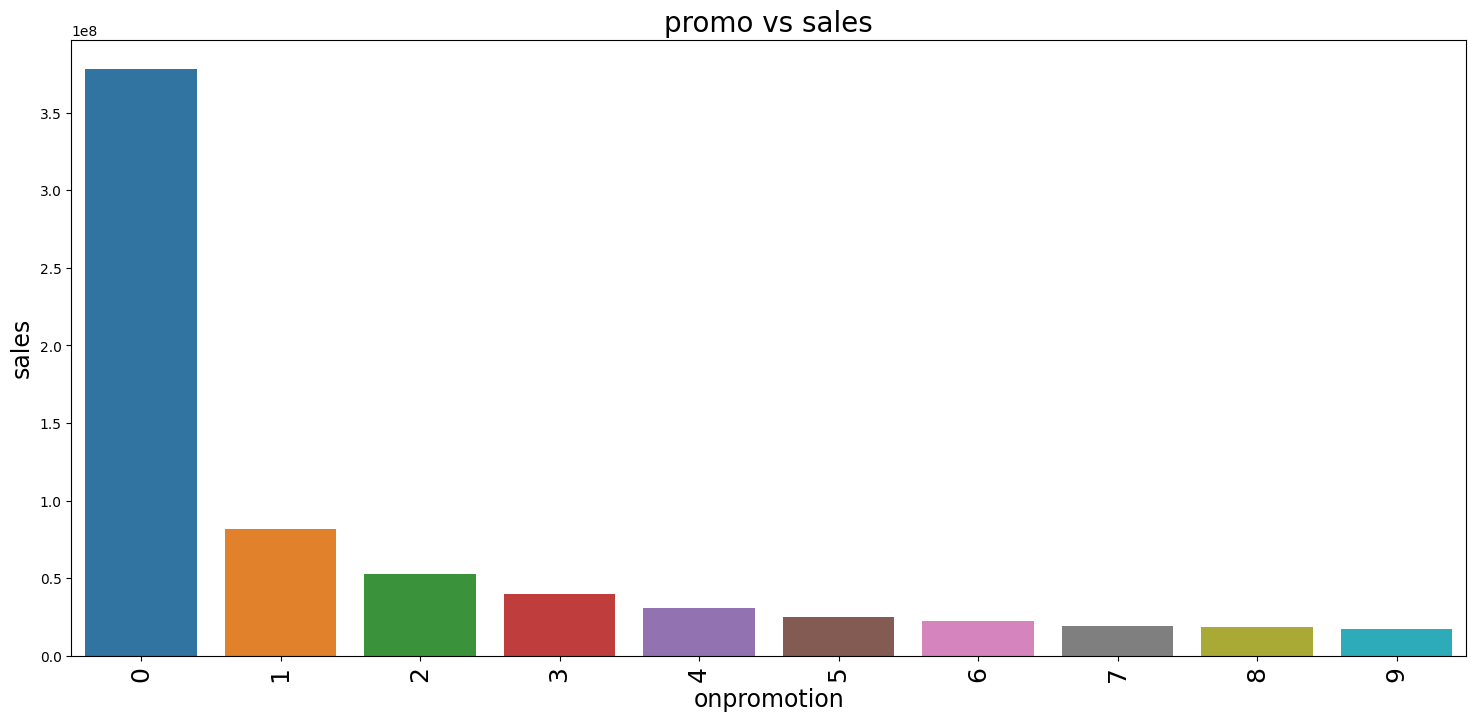

In [171]:
plots=plt.figure(figsize=(18,8))
plots=plt.title('promo vs sales',fontsize=20)
plots=plt.xticks((0,1))
plots=plt.xticks(fontsize=18,rotation='vertical')
plots=plt.xlabel('not_onpromotion / onpromotion',fontsize=17)
plots=plt.ylabel('sales',fontsize=17)
plots=sns.barplot(x='onpromotion',y='sales',data=onpromo)
plt.savefig('promo.png',dpi=300)


Items that are not on promotion, have higher sales than items on promotion. This means very few items are on promotion. 0 was used to note Items that are not on promotion.

In [172]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


**Which state had the highest number of stores**

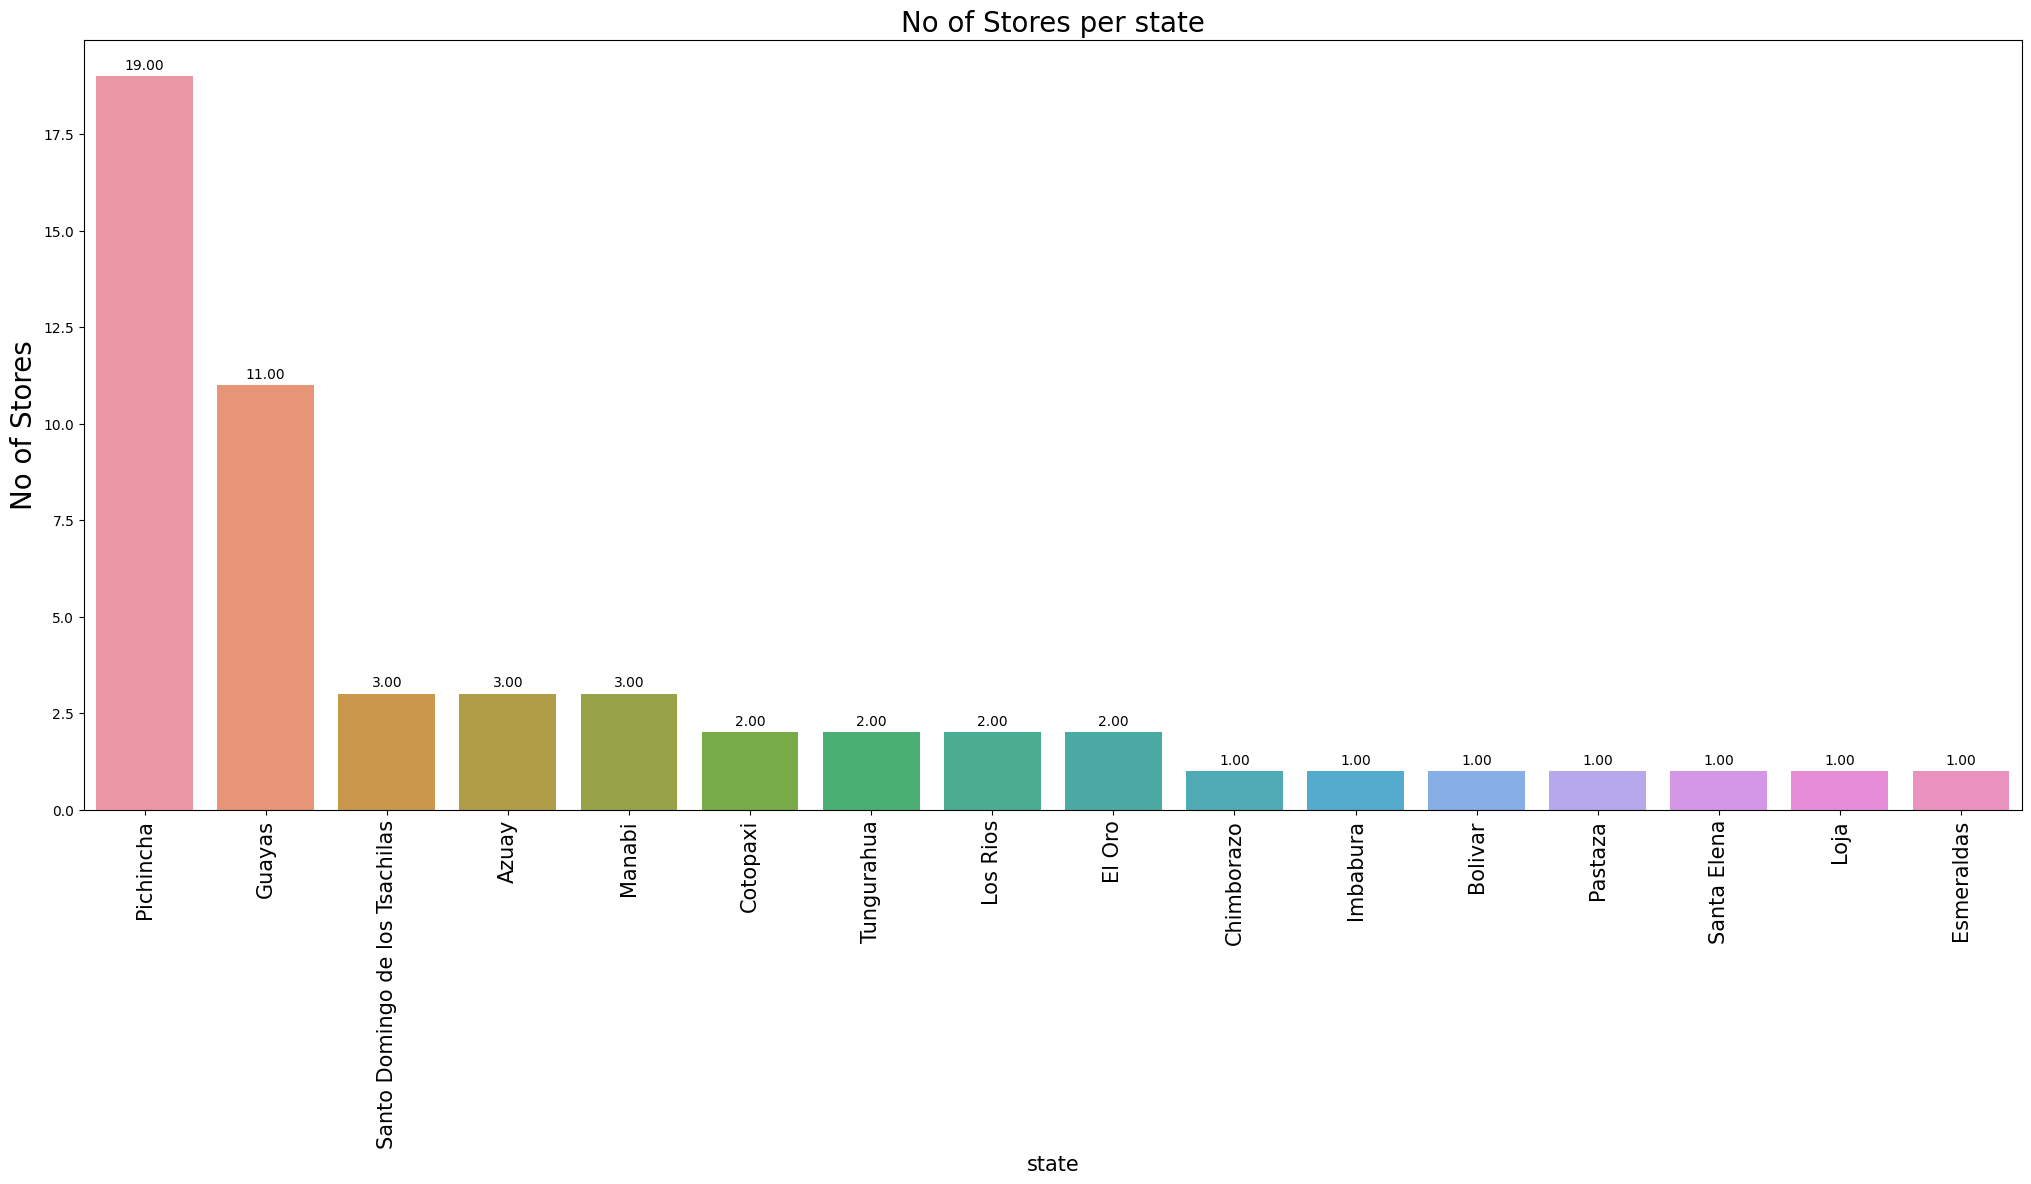

In [173]:
#Fetching no.of stores in each state
x = stores_df.state.value_counts().to_frame()

#Plotting city Vs no.of stores
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
plots = sns.barplot(x = x.index, y= "state",data=x)
plots.set_xticklabels(ax.get_xticklabels(), rotation = 'vertical', fontsize = 15)
#plots=plt.xticks(fontsize=18,rotation='vertical')
plt.title('No of Stores per state',fontsize=20)
plt.xlabel('state',fontsize=15)
plt.ylabel('No of Stores',fontsize=20)

for bar in plots.patches:
 plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')
plt.show()

Pichincha state had the most number of stores.

**State with highest sales**

In [174]:
#fetching sales data from train dataset
store_sales = pd.merge(stores_df , train_df[['store_nbr' , 'sales']], on= 'store_nbr', how= 'left')
store_sales

,store_nbr,city,state,type,cluster,sales
0,1,Quito,Pichincha,D,13,0.000
1,1,Quito,Pichincha,D,13,0.000
2,1,Quito,Pichincha,D,13,0.000
3,1,Quito,Pichincha,D,13,0.000
4,1,Quito,Pichincha,D,13,0.000
...,...,...,...,...,...,...
3000883,54,El Carmen,Manabi,C,3,59.619
3000884,54,El Carmen,Manabi,C,3,94.000
3000885,54,El Carmen,Manabi,C,3,915.371
3000886,54,El Carmen,Manabi,C,3,0.000


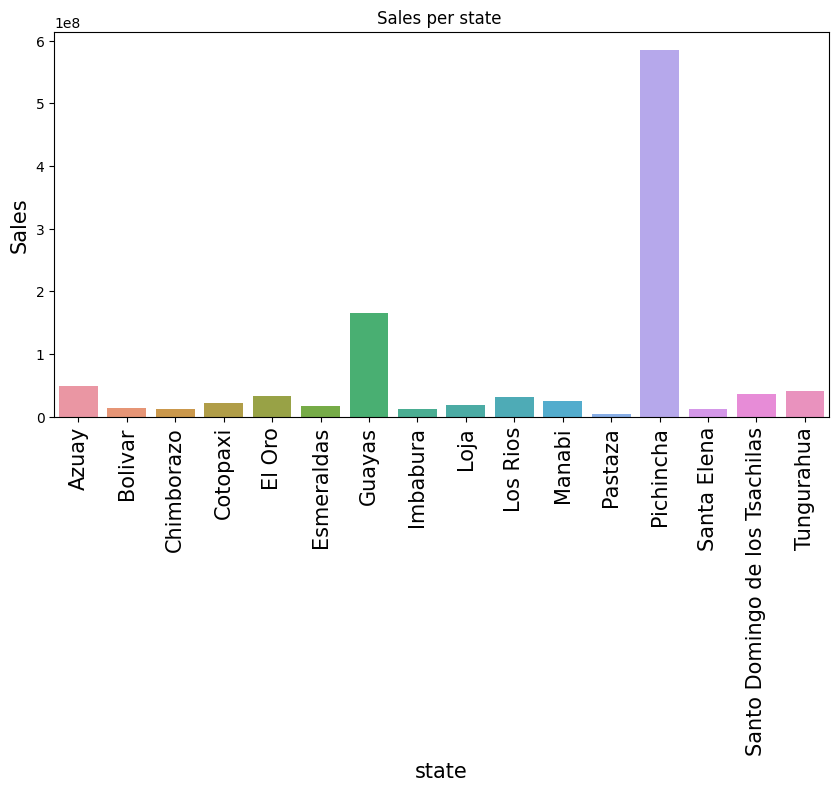

In [175]:
#Group by city and sum of sales for each city
x = store_sales.groupby(['state'], as_index=False).agg({'sales':'sum'}) 

#Plotting city Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.state, y= "sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 'vertical', fontsize = 15)
plt.title("Sales per state ")
plt.ylabel('Sales',fontsize=15)
plt.xlabel('state',fontsize=15)
plt.show()

Pichincha has the maximum sales(as it has the highest number of stores). followed by Guayas.
The other states have lower sales.

**Which city had the highest number of stores/Number of stores per city**

Text(0, 0.5, 'No of Stores')

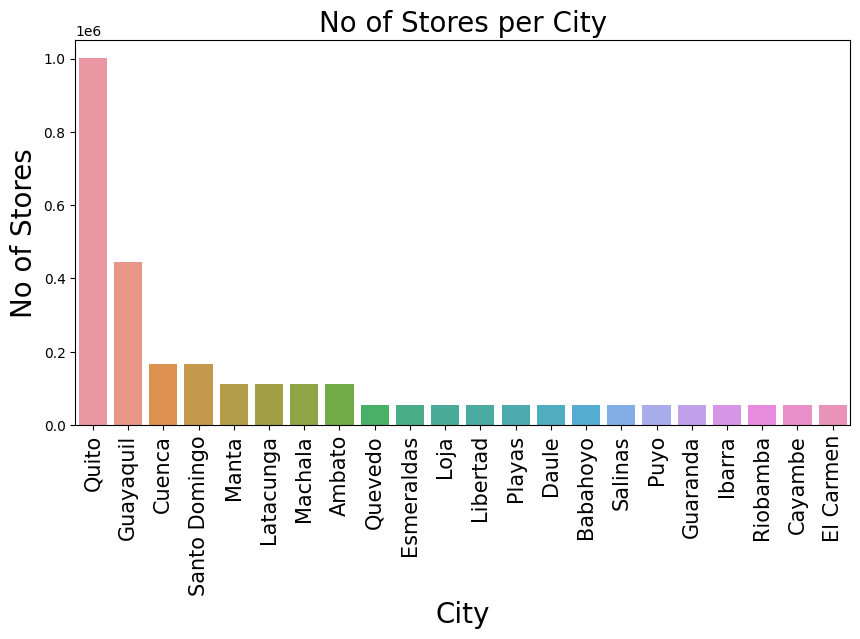

In [176]:
#Fetching no.of stores in each city
x=store_sales.city.value_counts().to_frame()

#Plotting city Vs no.of stores
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plots = sns.barplot(x = x.index, y= "city",data=x)
plots.set_xticklabels(ax.get_xticklabels(), rotation = 'vertical', fontsize = 15)
plt.title('No of Stores per City',fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('No of Stores',fontsize=20)

#for bar in plots.patches:
 #plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=10, xytext=(0, 8), textcoords='offset points')
#plt.show()


The city Quito has the highest number of stores.

**city with highest sales**

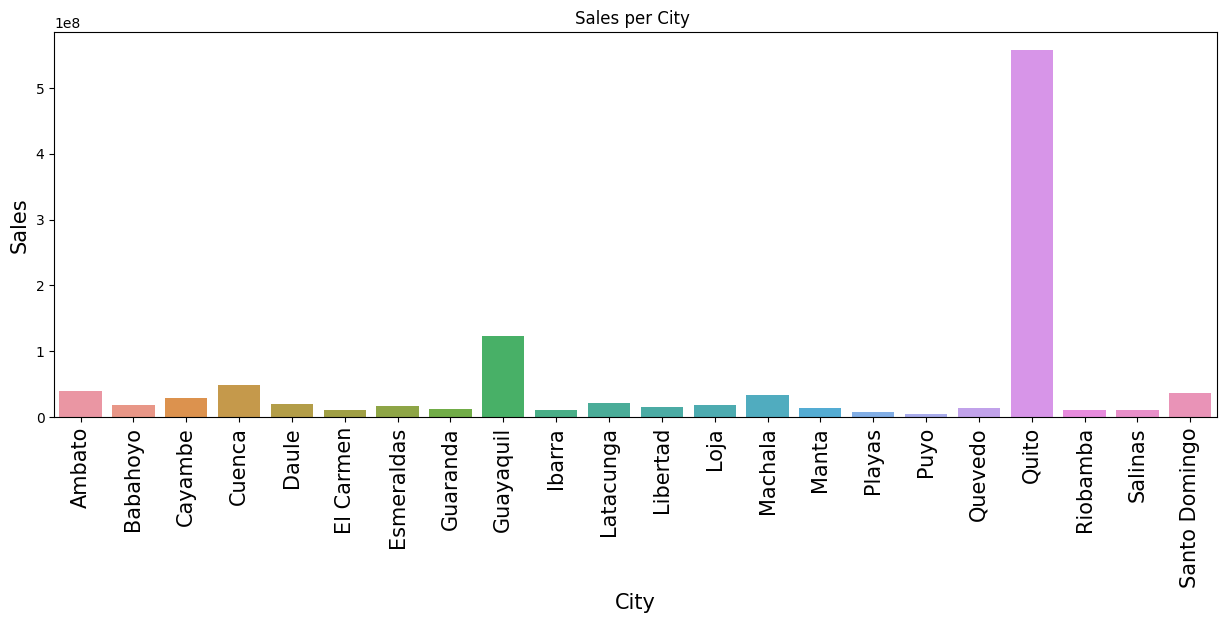

In [177]:
#Group by city and sum of sales for each city
x = store_sales.groupby(['city'], as_index=False).agg({'sales':'sum'}) 

#Plotting city Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax = sns.barplot(x = x.city, y= "sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 'vertical', fontsize = 15)
plt.title("Sales per City ")
plt.ylabel('Sales',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.show()

Quito has the maximum sales as it has the maximum stores Followed by Guayaquil.

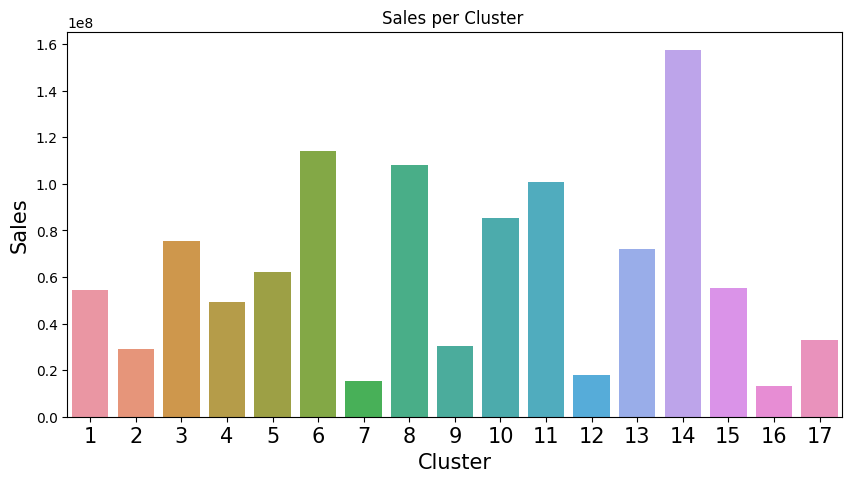

In [178]:
#Group by cluster and sum of sales for each cluster
x = store_sales.groupby(['cluster'], as_index=False).agg({'sales':'sum'}) 

#Plotting city Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.cluster, y= "sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
plt.title("Sales per Cluster ")
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Cluster',fontsize=15)
plt.show()

54 unique stores and these are clustered into 17 unique groups
Cluster no.14 has maximum no. of stores followed by 6 and 8

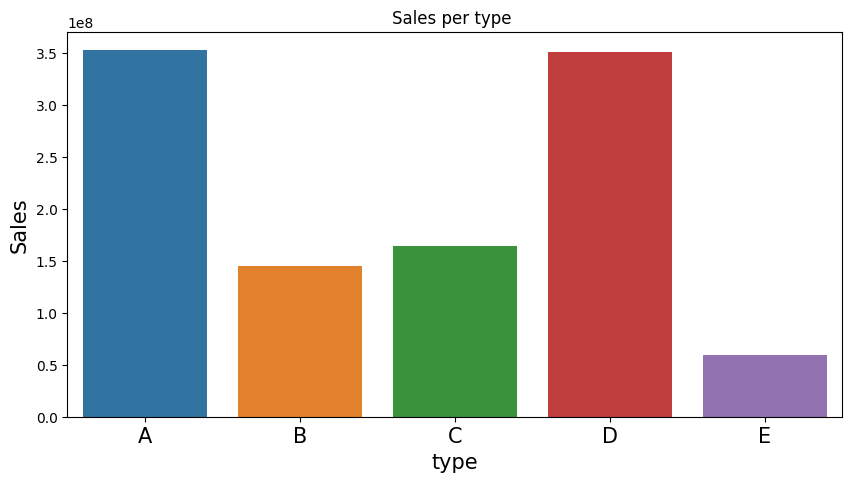

In [179]:
#Group by type and sum of sales for each type
x = store_sales.groupby(['type'], as_index=False).agg({'sales':'sum'}) 

#Plotting city Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.type, y= "sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)
plt.title("Sales per type ")
plt.ylabel('Sales',fontsize=15)
plt.xlabel('type',fontsize=15)
plt.show()

Types A and D have much higher sales as compared to other Types.

Type E has minimum sales.

In [180]:
holidays_events_df.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [181]:
holidays_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [182]:
#converting date column to datetime64 type
holidays_events_df['date'] = holidays_events_df['date'].astype('datetime64')
holidays_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


**Which locale has the most holidays**

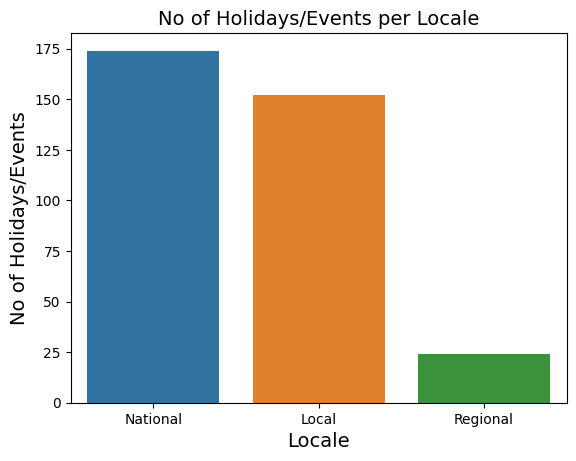

In [183]:
#Fetching no.of days for each locale 
holidays = holidays_events_df.locale.value_counts().to_frame()

#Plotting Locale Vs no_of_days
fig, ax = plt.subplots()
ax = sns.barplot(x = holidays.index, y= "locale",data=holidays)
plt.title('No of Holidays/Events per Locale',fontsize=14)
plt.xlabel('Locale',fontsize=14)
plt.ylabel('No of Holidays/Events',fontsize=14)
plt.show()

The bar chart shows that most holidays or events are national followed by local before regional.

**Sales per Locale**

In [184]:
#we first merge the data
holidays_events_df['date'] = holidays_events_df['date'].astype('datetime64')
holidays_sales = pd.merge(holidays_events_df , train_df[['date' , 'sales']], on= 'date', how= 'left')
holidays_sales

,date,type,locale,locale_name,description,transferred,sales
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,NaN
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,NaN
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,NaN
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,NaN
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,NaN
...,...,...,...,...,...,...,...
502587,2017-12-22,Additional,National,Ecuador,Navidad-3,False,NaN
502588,2017-12-23,Additional,National,Ecuador,Navidad-2,False,NaN
502589,2017-12-24,Additional,National,Ecuador,Navidad-1,False,NaN
502590,2017-12-25,Holiday,National,Ecuador,Navidad,False,NaN


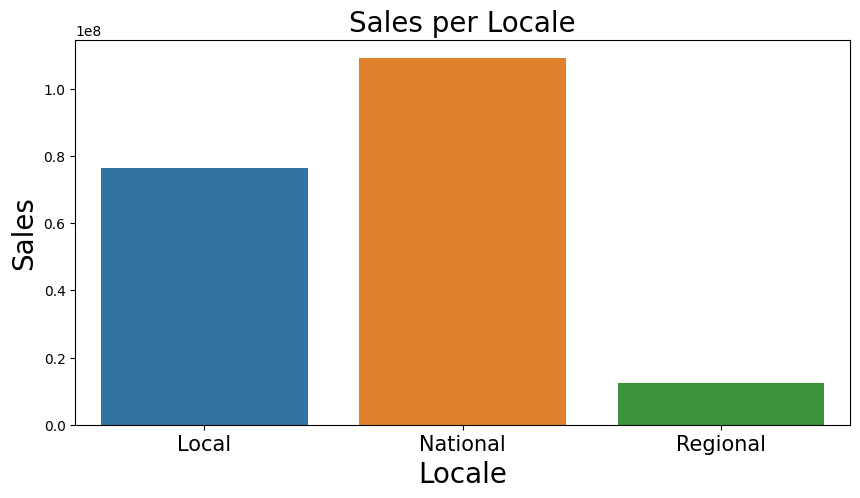

In [185]:
#Group by locale and sum of sales for each locale
x = holidays_sales.groupby(['locale'], as_index=False).agg({'sales':'sum'}) 

#Plotting locale Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.locale, y= "sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('Locale', fontsize= 20)
plt.title('Sales per Locale',fontsize= 20)
plt.show()

Maximum sales happens on National Holidays/Events followed by Local Holidays/Events. Regional has the least sales as it also has the least no of holidays.

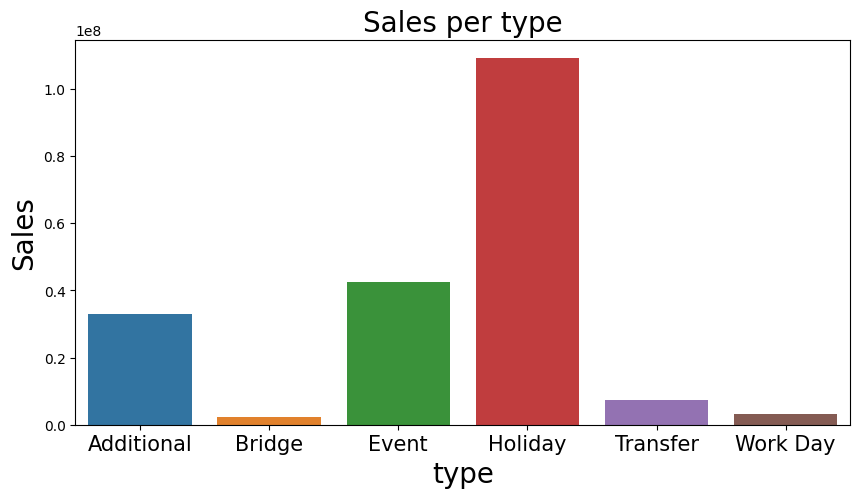

In [186]:
#Group by type and sum of sales for each locale
x = holidays_sales.groupby(['type'], as_index=False).agg({'sales':'sum'}) 

#Plotting locale Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.type, y= "sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('type', fontsize= 20)
plt.title('Sales per type',fontsize= 20)
plt.show()

Special Days of type Holiday and Event have higher sales as compared to other types.
Bridge and Work day have lowest Sales

In [187]:
oil_prices_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [188]:
# using backfill to fill nan values

oil_prices_df['date'] = oil_prices_df['date'].astype('datetime64')
oil_prices = oil_prices_df.fillna(method = 'backfill')
oil_prices.iloc[[0,1,1216,1217],:]

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [189]:
#we merge the data
oil_prices_df['date'] = oil_prices_df['date'].astype('datetime64')
oil_prices_sales = pd.merge(oil_prices_df , train_df[['date' , 'sales']], on= 'date', how= 'left')
oil_prices_sales


,date,dcoilwtico,sales
0,2013-01-01,NaN,0.0
1,2013-01-01,NaN,0.0
2,2013-01-01,NaN,0.0
3,2013-01-01,NaN,0.0
4,2013-01-01,NaN,0.0
...,...,...,...
2143756,2017-08-25,47.65,NaN
2143757,2017-08-28,46.40,NaN
2143758,2017-08-29,46.46,NaN
2143759,2017-08-30,45.96,NaN


<AxesSubplot:>

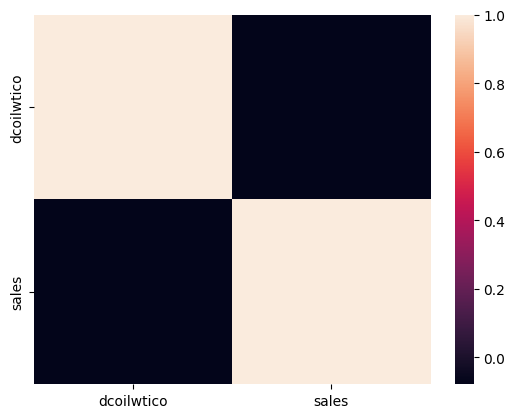

In [190]:
sns.heatmap(oil_prices_sales.corr())

In [191]:
oil_prices_sales[['dcoilwtico','sales']].corr()

,dcoilwtico,sales
dcoilwtico,1.00000,-0.07905
sales,-0.07905,1.00000


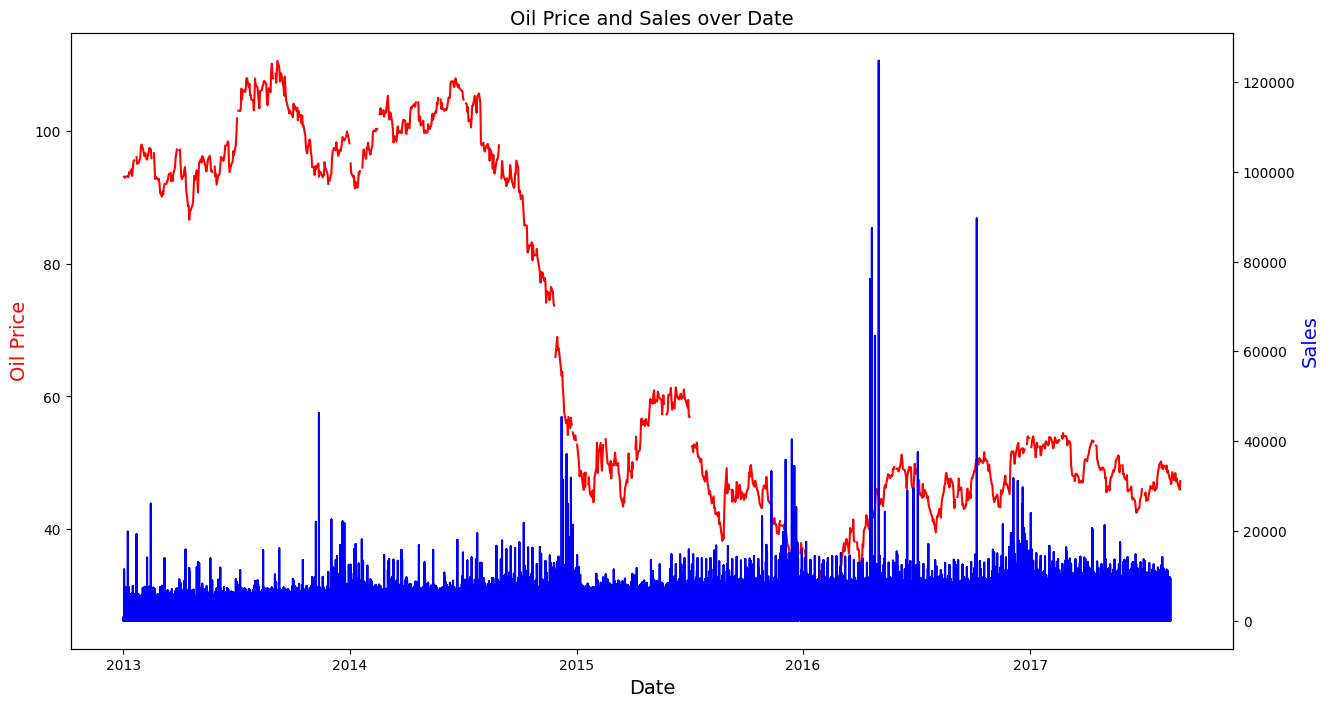

In [192]:
#Plotting date vs oil price(1st y axis) 
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(oil_prices_sales.date, oil_prices_sales.dcoilwtico, color="red")
x = oil_prices_sales
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Oil Price",color="red",fontsize=14)
ax.figsize=(50,11)

#Plotting date vs unit_sales(2nd y axis) 
ax2=ax.twinx()   # twin object for two different y-axis on the sample plot
ax2.plot(x.date, x.sales, color="blue")  # make a plot with different y-axis using second axis object
ax2.set_ylabel("Sales",color="blue",fontsize=14)
plt.title('Oil Price and Sales over Date',fontsize=14)
plt.show()

By analysing the above plots, we can see that it is difficult to interprete a link between oil prices and sale. i.e - oil prices and sales are not much correlated.

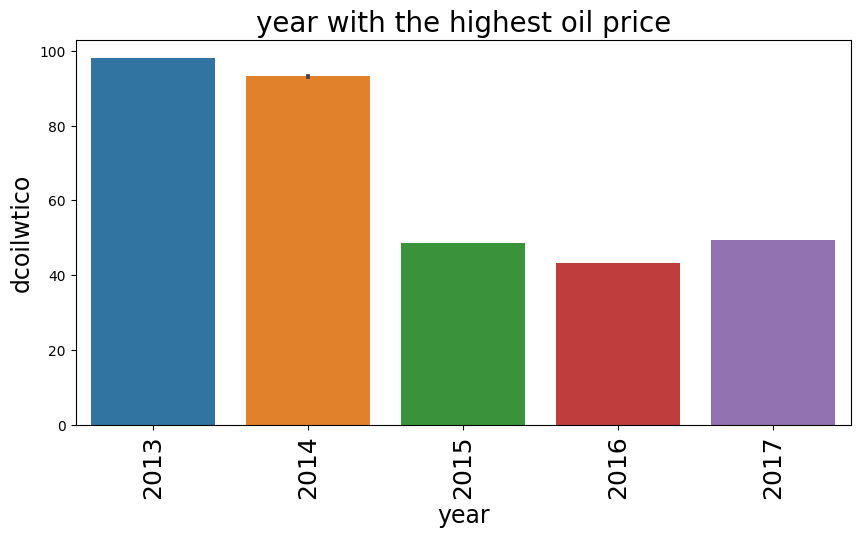

In [193]:
# getting year out of the date column in the dataset.
oil_prices_sales['year'] = oil_prices_sales['date'].dt.year

#plotting oil prices per year
plots=plt.figure(figsize=(10,5))
plots=plt.title('year with the highest oil price',fontsize=20)
plots=plt.xticks(fontsize=18,rotation='vertical')
plots=plt.xlabel('store_nbr',fontsize=17)
plots=plt.ylabel('sales',fontsize=17)
plots=sns.barplot(x='year',y='dcoilwtico',data = oil_prices_sales)
plt.savefig('top10startups.png',dpi=300)

from this plot it can be seen that oil prices dropped between 2013 and 2016

**Summary**

Days of weak, Year and Month would also be added as features for sales prediciton.

Store Features such as city, state, type, and cluster are important for predicting sales.

Item Features including family is also important and would be used for prediction.

Locale and Type of Holiday/events features can be also be considered.

Oil price is not much related so it can be discarded.









**FEATURE ENGINEERING**

In [194]:
test_df.head()


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [195]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


changing date column format from object to datetime

In [196]:
#changing date column format from object to datetime
test_df['date'] = pd.to_datetime(test_df['date'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


The test data, having the same features as the training data. We have to predict the target sales for the dates in this file.

The dates in the test data are for the 15 days after the last date in the training data.

***LABEL ENCODING***

In [197]:
#initializing label encoder

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [198]:
#transforming family column in the test dataset

test_df['family'] = LE.fit_transform(test_df['family'])
test_df.tail()

,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,28,1
28508,3029396,2017-08-31,9,29,0
28509,3029397,2017-08-31,9,30,1
28510,3029398,2017-08-31,9,31,9
28511,3029399,2017-08-31,9,32,0


In [199]:
#transforming family column in the test dataset

train_df['family'] = LE.fit_transform(train_df['family'])
#train_df['month'] = LE.fit_transform(train_df['month'])
#train_df['day_of_week'] = LE.fit_transform(train_df['day_of_week'])

train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.dayofweek

train_df

,id,date,store_nbr,family,sales,onpromotion,year,month_name,day_of_week_name,month,day
0,0,2013-01-01,1,0,0.000,0,2013,January,Tuesday,1,1
1,1,2013-01-01,1,1,0.000,0,2013,January,Tuesday,1,1
2,2,2013-01-01,1,2,0.000,0,2013,January,Tuesday,1,1
3,3,2013-01-01,1,3,0.000,0,2013,January,Tuesday,1,1
4,4,2013-01-01,1,4,0.000,0,2013,January,Tuesday,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28,438.133,0,2017,August,Tuesday,8,1
3000884,3000884,2017-08-15,9,29,154.553,1,2017,August,Tuesday,8,1
3000885,3000885,2017-08-15,9,30,2419.729,148,2017,August,Tuesday,8,1
3000886,3000886,2017-08-15,9,31,121.000,8,2017,August,Tuesday,8,1


In [200]:
#

#transforming state column
stores_df['state'] = LE.fit_transform(stores_df['state'])
#transforming city column
stores_df['city'] = LE.fit_transform(stores_df['city'])
#transforming type column
stores_df['type'] = LE.fit_transform(stores_df['type'])

stores_df.head()

,store_nbr,city,state,type,cluster
0,1,18,12,3,13
1,2,18,12,3,13
2,3,18,12,3,8
3,4,18,12,3,9
4,5,21,14,3,4


In [201]:
transactions_df

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [202]:
holidays_events_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [203]:
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])

holidays_events_df['year'] = holidays_events_df['date'].dt.year

holidays_events_df['month'] = holidays_events_df['date'].dt.month

holidays_events_df['day'] = holidays_events_df['date'].dt.dayofweek


# getting ordinal values of the day of the week, starting at 0 for Monday and ending at 6 for Sunday.
holidays_events_df['day_of_week'] = holidays_events_df['date'].dt.dayofweek

# adding a column for weekdays, represented by value 1.
holidays_events_df['weekdays'] = 1
holidays_events_df.loc[holidays_events_df.day_of_week > 4, 'weekdays'] = 0

#adding a column for holidays
holidays_events_df['is_holiday'] = 0

holidays_events_df.loc[holidays_events_df.type == 'Work Day', 'is_holiday'] = 1
# A workday event is also represented by value 1 since it's on a weekday.
holidays_events_df.loc[(holidays_events_df.type == 'Holiday') & (holidays_events_df.transferred == False), 'is_holiday'] = 0
# If the Holiday is not transferred, then that means it is not a work day. Hence, it is represented by 0.
holidays_events_df.loc[(holidays_events_df.type == 'Holiday') & (holidays_events_df.transferred == True), 'is_holiday'] = 1
# In this case,Holiday has been tagged as transferred,these Holidays are treated as normal days on which there is work.hence the representation of value 1 meaning its a weekday.
holidays_events_df.loc[holidays_events_df.type == 'Transfer', 'is_holiday'] = 0
# 'Transfer' contains the dates on which the holidays that were transferred, meaning it's not a work day.
# Since there is no work and a 'Transfer' day is essentially a holiday, I decided to have it represented as 0.
holidays_events_df.loc[holidays_events_df.type == 'Bridge', 'is_holiday'] = 0
# 'Bridge' days are extra days added to a Holiday, so I used 0 to represent it as well.
holidays_events_df.loc[holidays_events_df.type == 'Additional', 'is_holiday'] = 0
# Additional is also not a working day so i represented it as o
holidays_events_df.loc[holidays_events_df.type == 'Events', 'is_holiday'] = 0
# i represented events with 0 because most events do not take place on a working day.

#transforming type column
holidays_events_df['type'] = LE.fit_transform(holidays_events_df['type'])

# Now dropping some columns
holidays_events_df.drop(['locale', 'locale_name', 'description', 'transferred'], axis = 1, inplace = True)

holidays_events_df


,date,type,year,month,day,day_of_week,weekdays,is_holiday
0,2012-03-02,3,2012,3,4,4,1,0
1,2012-04-01,3,2012,4,6,6,0,0
2,2012-04-12,3,2012,4,3,3,1,0
3,2012-04-14,3,2012,4,5,5,0,0
4,2012-04-21,3,2012,4,5,5,0,0
...,...,...,...,...,...,...,...,...
345,2017-12-22,0,2017,12,4,4,1,0
346,2017-12-23,0,2017,12,5,5,0,0
347,2017-12-24,0,2017,12,6,6,0,0
348,2017-12-25,3,2017,12,0,0,1,0


In [204]:
#Putting all dataframes together
merge1 = pd.merge(train_df, test_df, on=['date', 'store_nbr', 'family', 'onpromotion', 'id'], how='left')
merge2 = pd.merge(transactions_df, stores_df, on=['store_nbr'], how='left')
merge3 = pd.merge(merge2, holidays_events_df, on=['date', 'type'], how='left')
final_data = pd.merge(merge1, merge3, on=['store_nbr', 'date', 'year', 'month', 'day' ], how='left')

#dropping some columns
final_data.drop(['id', 'month_name', 'day_of_week_name', 'date'], axis = 1, inplace = True)
final_data




,store_nbr,family,sales,onpromotion,year,month,day,transactions,city,state,type,cluster,day_of_week,weekdays,is_holiday
0,1,0,0.000,0,2013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0.000,0,2013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.000,0,2013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,0.000,0,2013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,4,0.000,0,2013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010387,9,28,438.133,0,2017,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3010388,9,29,154.553,1,2017,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3010389,9,30,2419.729,148,2017,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3010390,9,31,121.000,8,2017,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
final_data.dropna(inplace=True)
final_data

,store_nbr,family,sales,onpromotion,year,month,day,transactions,city,state,type,cluster,day_of_week,weekdays,is_holiday
561,25,0,0.000,0,2013,1,1,770.0,20.0,13.0,3.0,1.0,1.0,1.0,0.0
562,25,1,0.000,0,2013,1,1,770.0,20.0,13.0,3.0,1.0,1.0,1.0,0.0
563,25,2,2.000,0,2013,1,1,770.0,20.0,13.0,3.0,1.0,1.0,1.0,0.0
564,25,3,810.000,0,2013,1,1,770.0,20.0,13.0,3.0,1.0,1.0,1.0,0.0
565,25,4,0.000,0,2013,1,1,770.0,20.0,13.0,3.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010354,8,28,548.982,0,2017,8,1,2621.0,18.0,12.0,3.0,8.0,1.0,1.0,0.0
3010355,8,29,143.714,0,2017,8,1,2621.0,18.0,12.0,3.0,8.0,1.0,1.0,0.0
3010356,8,30,3939.392,10,2017,8,1,2621.0,18.0,12.0,3.0,8.0,1.0,1.0,0.0
3010357,8,31,0.000,0,2017,8,1,2621.0,18.0,12.0,3.0,8.0,1.0,1.0,0.0


**MODELING**

In [206]:
final_data[final_data['year'] == 2016].month.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [207]:
final_data[final_data['year'] == 2017].month.unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

**creating train and test set**

In [208]:
train = final_data.loc[(final_data['year'].isin([2016]) & final_data['month'].isin([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))]
test = final_data.loc[(final_data['year'].isin([2017]) & final_data['month'].isin([1, 2, 3, 4, 5, 6, 7, 8]))]

In [209]:
train.year.unique(), train.month.unique()

(array([2016], dtype=int64),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64))

In [210]:
test.year.unique(), test.month.unique()

(array([2017], dtype=int64), array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64))

**linear regression model**

In [211]:
X_train = train.drop(columns=['sales'])
y_train = train['sales']

X_test = test.drop(columns=['sales'])
y_test = test['sales']


In [212]:
from statistics import LinearRegression, linear_regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [213]:
y_pred = linear_model.predict(X_test)

In [214]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(y_test, y_pred)

494.432876650043

In [215]:
from sklearn.metrics import mean_squared_error


np.sqrt(mean_squared_error(y_test, y_pred))

1046.9352662680571

**Decission tree**

In [216]:
from sklearn.tree import DecisionTreeRegressor


decision_tree_model = DecisionTreeRegressor(random_state=167)

In [217]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=167)

In [218]:
y_pred =decision_tree_model.predict(X_test)
y_pred

array([   7.   ,    0.   ,   11.   , ..., 4729.204,    0.   ,   36.781])

In [219]:
mean_absolute_error(y_test, y_pred)

133.14261229152626

In [220]:
np.sqrt(mean_squared_error(y_test, y_pred))

479.0341864045416

In [221]:
from sklearn.metrics import mean_squared_log_error


np.sqrt(mean_squared_log_error(y_test, y_pred))

0.7338334080091434

In [222]:
decision_tree_model.feature_importances_

array([1.35976377e-02, 2.37652341e-01, 4.43566225e-01, 0.00000000e+00,
       5.68621712e-03, 4.20997789e-03, 2.49295036e-01, 2.25233287e-03,
       3.35337596e-03, 1.46956786e-02, 1.35616731e-02, 1.14923091e-02,
       5.39520708e-04, 9.76762432e-05])

<BarContainer object of 14 artists>

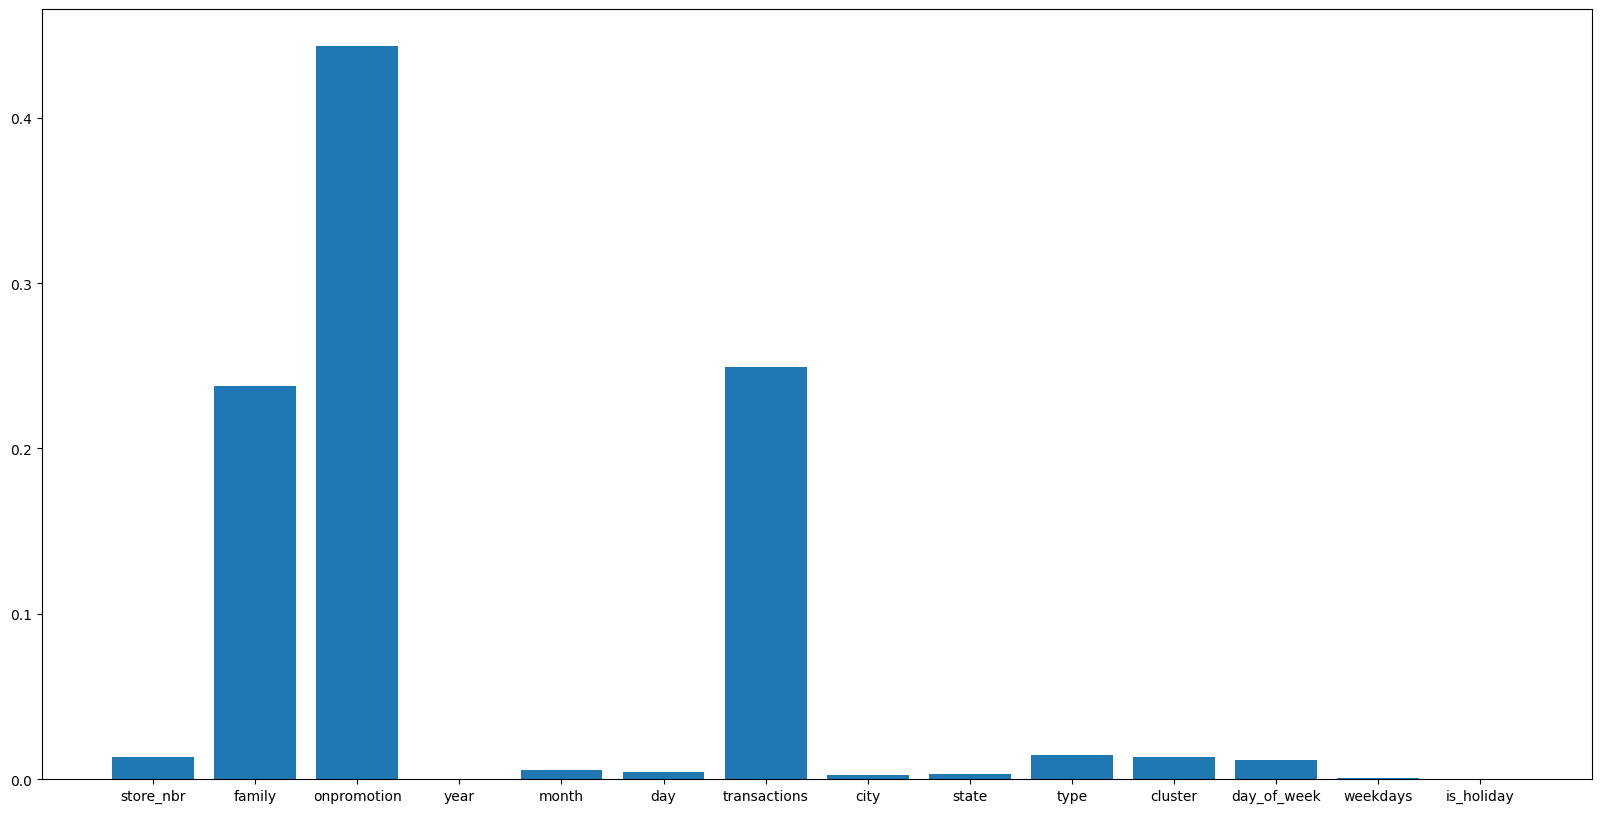

In [223]:
plt.figure(figsize=(20,10))
plt.bar(x=X_train.columns, height=decision_tree_model.feature_importances_)


In [224]:
from tkinter import N
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)
rfr

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=500,
                      random_state=18)

In [225]:
y_pred = rfr.predict(X_test)

In [226]:
mean_absolute_error(y_test, y_pred)

418.1366149014323

In [227]:
np.sqrt(mean_squared_error(y_test, y_pred))

890.7200884258111

In [228]:
np.sqrt(mean_squared_log_error(y_test, y_pred))

2.835654216407412

In [233]:
y_pred = decision_tree_model.predict(X_test)

submission = pd.DataFrame(y_pred)
submission


,0
0,7.000
1,0.000
2,11.000
3,5173.000
4,0.000
...,...
14416,503.125
14417,178.082
14418,4729.204
14419,0.000


In [240]:
submission.to_csv('sample_submissions.csv', header=True)
